In [1]:
# vectores
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:
# las posiciones 'y' and la carga
d = 0.5
q = 10

omega = 2 * np.pi / 10
c = 1




# plotting de color
N = 50
limits = 10
x = np.linspace(-limits, limits, N)
z = np.linspace(-limits, limits, N)
# full coordinate arrays
xx, zz = np.meshgrid(x, z)



#### campo electrico 2d
del Griffiths pagina 447, dipole radiation
$$
\vec E = - \nabla V - \frac{\partial \vec A}{\partial t}= - \frac{\mu_0 p_0 \omega^2}{4\pi} 
(\frac{\sin \theta}{r}) \cos[\omega(t-r/c)]  \hat \theta
$$

In [30]:
def E2dipolo(rx, rz, t, p0):
    '''
    campo para un dipolo con centro en x,y,z = (0,0,0)
    donde se utiliza phi = 0, por tanto el slice y=0

    se vuelve un plot de x,z
    '''
    R = np.array( [ rx, rz ] )
    theta = np.arctan2(rx,rz)
    
    
    E_field_mag = np.cos( omega * (t- R/c ) ) * np.sin(theta) / R
    
    # vector que apunta en la direccion
    theta_hat = np.array([ np.cos(theta)  , - np.sin(theta) ])


    return - E_field_mag * theta_hat

In [31]:
p0 = 2*q*d
t = 0

pos = d * np.cos(omega * t)
E_t = lambda x,z: E2dipolo(x, z, t, p0)



E_field = np.vectorize(E_t, signature='(),()->(n)')(xx, zz)
Ex = E_field[:,:,0] 
Ez = E_field[:,:,1] 

In [32]:
Emagnitud = np.sqrt(Ex**2 + Ez**2)

# normalizando
Ex = 2* Ex / Emagnitud
Ez = 2*Ez / Emagnitud

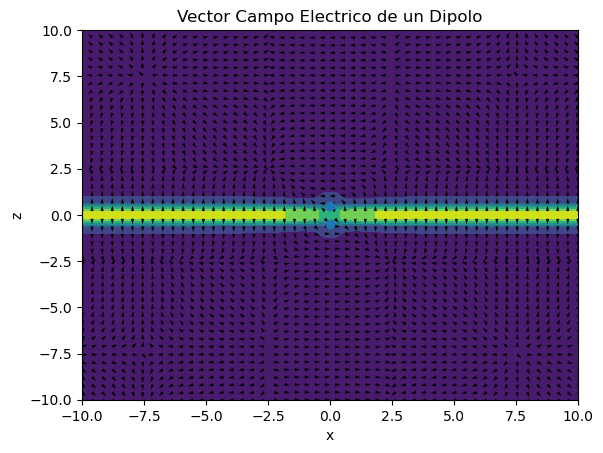

In [33]:
fig = plt.figure()
ax = fig.add_subplot()


# el campo electrico
plt.title("Vector Campo Electrico de un Dipolo")

ax.contourf(x, z, Emagnitud)
ax.quiver(xx, zz, Ex, Ez)
ax.scatter([0,0], [pos,-pos])

plt.xlabel('x')
plt.ylabel('z')
plt.show()

### Generando varias

In [34]:
# vectores
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


def E2dipolo(rx, rz, t, p0):
    '''
    campo para un dipolo con centro en x,y,z = (0,0,0)
    donde se utiliza phi = 0, por tanto el slice y=0

    se vuelve un plot de x,z
    '''
    R = np.array( [ rx, rz ] )
    theta = np.arctan2(rx,rz)
    
    
    E_field_mag = np.cos( omega * (t- R/c ) ) * np.sin(theta) / R
    
    # vector que apunta en la direccion
    theta_hat = np.array([ np.cos(theta)  , - np.sin(theta) ])


    return - E_field_mag * theta_hat

In [38]:
# las posiciones 'y' and la carga
d = 0.5
q = 10

omega = 2 * np.pi / 10
c = 1
p0 = q*d



# plotting de color
N = 50
limits = 10
x = np.linspace(-limits, limits, N)
z = np.linspace(-limits, limits, N)
# full coordinate arrays
xx, zz = np.meshgrid(x, z)


In [39]:
for t in np.linspace(0,10,40):
    pos = d * np.cos(omega * t)

    E_t = lambda x,z: E2dipolo(x, z, t, p0)
    E_field = np.vectorize(E_t, signature='(),()->(n)')(xx, zz)
    Ex = E_field[:,:,0] 
    Ez = E_field[:,:,1] 

    Emagnitud = np.sqrt(Ex**2 + Ez**2)

    # normalizando
    Ex = Ex / Emagnitud
    Ez = Ez / Emagnitud

    fig = plt.figure()
    ax = fig.add_subplot()


    # el campo electrico
    plt.title("Vector Campo Electrico de un Dipolo")

    ax.contourf(x, z, Emagnitud)
    ax.quiver(xx, zz, Ex, Ez)
    ax.scatter([0,0], [pos,-pos])

    plt.xlabel('x')
    plt.ylabel('z')
    plt.savefig(f'plots2d/{t}.png')
    plt.close()